# Techniques for missing data imputation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer

In [4]:
dfOrig = pd.read_csv('dataset_diabetes.csv')
df = dfOrig
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   Plasma    768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
# summarize the shape of the raw data
print(df.shape)

(768, 9)


In [6]:
df.head()

,pregnant,Plasma,pressure,skin,insulin,mass,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [7]:
df.describe()

,pregnant,Plasma,pressure,skin,insulin,mass,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
def str_to_numeric(x):
    if x=='positive':
        return 1
    else:
        return -1

In [9]:
df['class'] = df['class'].apply(str_to_numeric)
df.head(10)

,pregnant,Plasma,pressure,skin,insulin,mass,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,-1
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,-1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
#count the number of missing values for each column of the data set
num_missing = (df[df.columns] == 0).sum()
num_missing

pregnant    111
Plasma        5
pressure     35
skin        227
insulin     374
mass         11
pedigree      0
age           0
class         0
dtype: int64

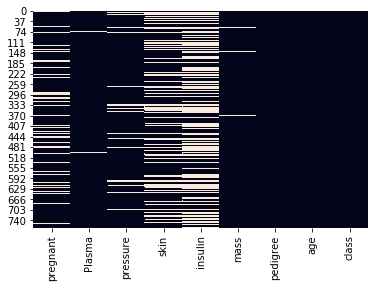

In [14]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# replace '0' values with 'nan' in the columns: ["pregnant","Plasma","pressure","skin","insulin","mass"]
NaNdf = df
cols = ["pregnant","Plasma","pressure","skin","insulin","mass"]
NaNdf[cols] = NaNdf[cols].replace(0, nan)

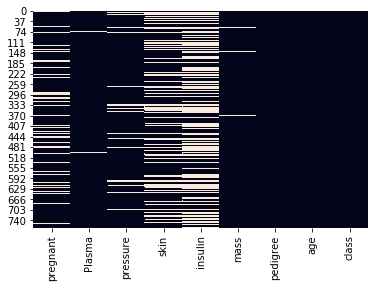

In [13]:
sns.heatmap(NaNdf.isnull(), cbar=False)

In [ ]:
num_missing = (NaNdf[NaNdf.columns] == 0).sum()
num_missing

In [ ]:
NaNdf.head(10)

In [ ]:
# summarize the shape of the raw data
print(NaNdf.shape)

## Remove rows with empty values

In [16]:
DropNan = NaNdf
# drop rows with missing values
DropNan.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(DropNan.shape)

(336, 9)


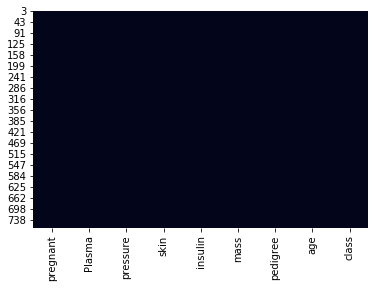

In [17]:
sns.heatmap(DropNan.isnull(), cbar=False)

## Impute Missing Values

In [ ]:
ImpDF = NaNdf
#fill missing values with the mean value for each column
ImpDF.fillna(ImpDF.mean(), inplace=True)
#count the number of NaN values in each column
print(ImpDF.isnull().sum())

In [ ]:
# summarize the shape of the raw data
print(ImpDF.shape)

In [ ]:
ImpDF.head(10)

## Impute missing values using scikit-learn package

In [ ]:
# convert data set with NaN values to numpy array to apply Scikit-learn package
values = NaNdf.values

In [ ]:
#https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.impute.simpleimputer/
#mean, median, most_frequent, constant
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

In [ ]:
print(transformed_values.shape)
print(transformed_values[:,1])
ndf = pd.DataFrame(data=transformed_values, columns=df.columns)